In [535]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

In [536]:
df = pd.read_csv('C:/Users/FRANK/Desktop/Proyectos Linkedin/Python Proyectos/Dia 14/disaster-events new.csv')
df.head()

,Entity,Year,Disasters
0,All disasters,1900,6
1,All disasters excluding earthquakes,1900,5
2,All disasters excluding extreme temperature,1900,6
3,Drought,1900,2
4,Earthquake,1900,1


In [537]:
df2 = df.copy()
print('Número de observaciones (filas) = {}'.format(df2.shape[0]))
print('Total de variables disponibles (columnas) = {} '.format(df2.columns.shape[0]))
print('Columnas que cuentan con un valor nulo -')
print(df2.isnull().sum())

Número de observaciones (filas) = 1144
Total de variables disponibles (columnas) = 3 
Columnas que cuentan con un valor nulo -
Entity       0
Year         0
Disasters    0
dtype: int64


In [538]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1144 entries, 0 to 1143
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Entity     1144 non-null   object
 1   Year       1144 non-null   int64 
 2   Disasters  1144 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 26.9+ KB


In [539]:
df2['Entity'].unique()

array(['All disasters', 'All disasters excluding earthquakes',
       'All disasters excluding extreme temperature', 'Drought',
       'Earthquake', 'Extreme weather', 'Flood', 'Volcanic activity',
       'Dry mass movement', 'Wet mass movement', 'Wildfire',
       'Extreme temperature', 'Fog', 'Glacial lake outburst flood'],
      dtype=object)

In [540]:
df2['Year'].unique()

array([1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910,
       1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921,
       1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932,
       1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943,
       1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954,
       1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965,
       1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976,
       1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987,
       1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998,
       1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020,
       2021, 2022, 2023, 2024], dtype=int64)

In [541]:
# Seleccionar solo las columnas numéricas
numeric_df = df.select_dtypes(include='number')

# Calcular la matriz de correlación
correlation_matrix = numeric_df.corr()

# Extraer la correlación entre 'Year' y 'Disasters'
correlation = correlation_matrix.loc['Year', 'Disasters']
correlation

0.4457506794121675

# Analisis

In [542]:
max_disasters = df2.groupby('Entity')['Disasters'].idxmax()
df2.loc[max_disasters]

,Entity,Year,Disasters
1097,All disasters,2021,441
1098,All disasters excluding earthquakes,2021,413
1099,All disasters excluding extreme temperature,2021,438
663,Drought,1983,54
769,Dry mass movement,1992,4
906,Earthquake,2004,42
999,Extreme temperature,2012,52
1127,Extreme weather,2023,140
932,Flood,2006,232
367,Fog,1952,1


In [543]:
max_disasters = df2.groupby('Entity')['Year'].idxmax()
df2.loc[max_disasters]

,Entity,Year,Disasters
1133,All disasters,2024,83
1134,All disasters excluding earthquakes,2024,77
1135,All disasters excluding extreme temperature,2024,81
1136,Drought,2024,7
1067,Dry mass movement,2018,1
1137,Earthquake,2024,6
1138,Extreme temperature,2024,2
1139,Extreme weather,2024,24
1140,Flood,2024,31
367,Fog,1952,1


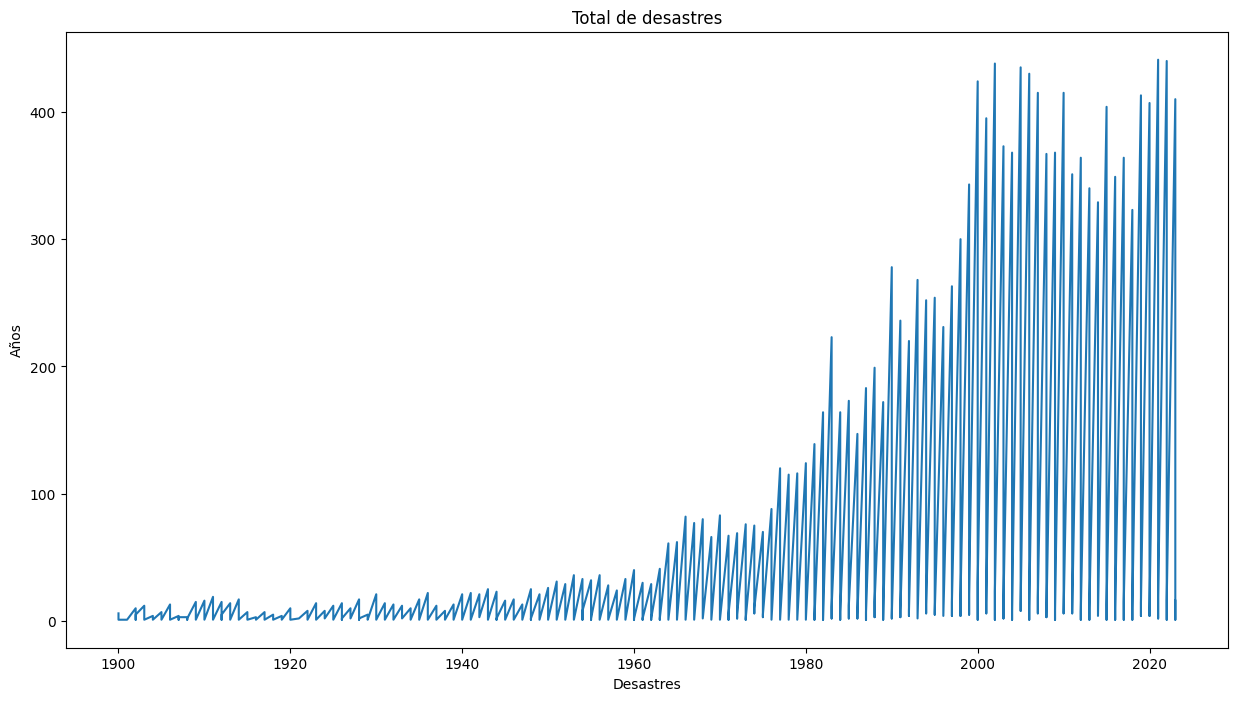

In [544]:
excluir_2024 = df2[df2['Year'] != 2024]

plt.figure(figsize=(15,8))
plt.plot(excluir_2024['Year'],excluir_2024['Disasters'])
plt.ylabel('Años')
plt.xlabel('Desastres')
plt.title('Total de desastres')
plt.show()

In [545]:
excluir_2024 = df2[df2['Year'] != 2024]
# Encontrar el índice del año con la mayor cantidad de desastres
año_mayor_desastres_idx = excluir_2024['Disasters'].idxmax()
año_mayor_desastres = excluir_2024.loc[año_mayor_desastres_idx]

print(f'Desde el año 1900 al 2023 a habido un total de',excluir_2024['Disasters'].sum(),'desastres naturales')
print(f'El año que se registró la mayor cantidad de desastres naturales fue en {año_mayor_desastres["Year"]} con un total de {año_mayor_desastres["Disasters"]} desastres')

Desde el año 1900 al 2023 a habido un total de 62012 desastres naturales
El año que se registró la mayor cantidad de desastres naturales fue en 2021 con un total de 441 desastres


# Terremoto

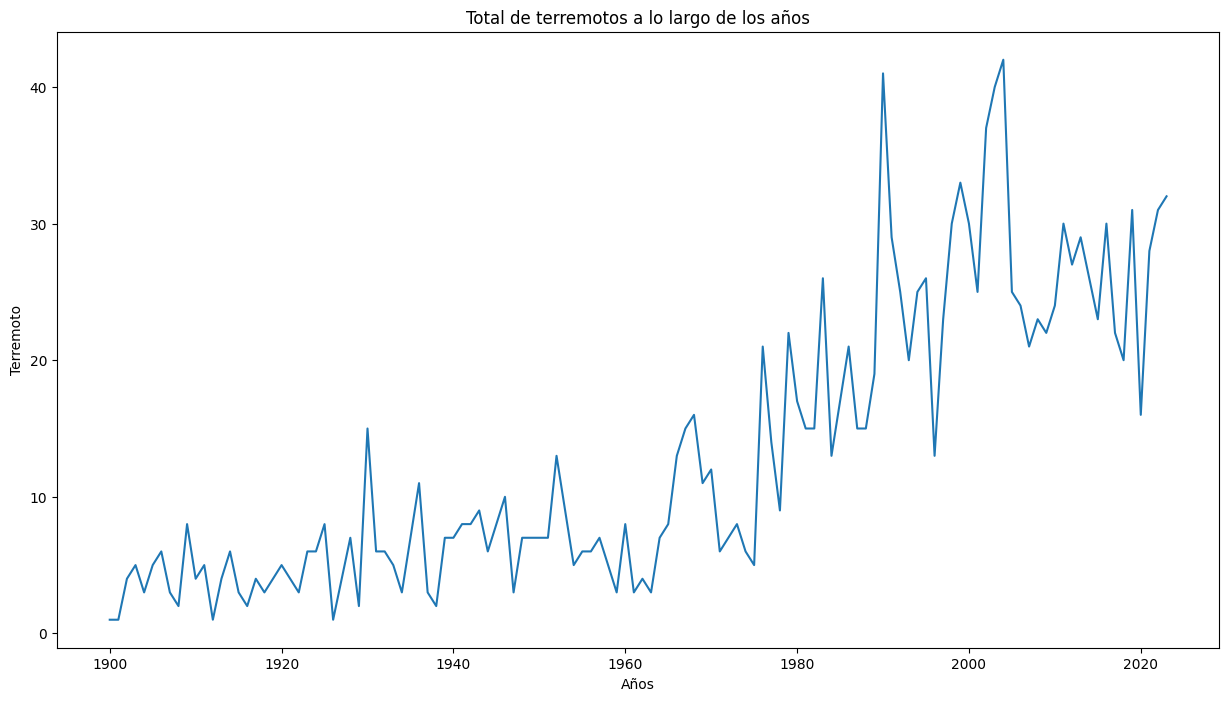

In [546]:
terremoto_no_2024 = excluir_2024[excluir_2024['Entity'] == 'Earthquake']
plt.figure(figsize=(15,8))
plt.plot(terremoto_no_2024['Year'],terremoto_no_2024['Disasters'])
plt.ylabel('Terremoto')
plt.xlabel('Años')
plt.title('Total de terremotos a lo largo de los años')
plt.show()

In [547]:
terremoto_no_2024 = excluir_2024[excluir_2024['Entity'] == 'Earthquake']
# Encontrar el índice del año con la mayor cantidad de desastres
año_mayor_terremotos_idx = terremoto_no_2024['Disasters'].idxmax()
año_mayor_desastres_terremotos = terremoto_no_2024.loc[año_mayor_terremotos_idx]

print(f'Desde el año 1900 al 2023 a habido un total de',terremoto_no_2024['Disasters'].sum(),'terremotos')
print(f'El año que se registró la mayor cantidad de desastres naturales fue en {año_mayor_desastres_terremotos["Year"]} con un total de {año_mayor_desastres_terremotos["Disasters"]} terremotos')

Desde el año 1900 al 2023 a habido un total de 1612 terremotos
El año que se registró la mayor cantidad de desastres naturales fue en 2004 con un total de 42 terremotos


# Actividad Volcanica

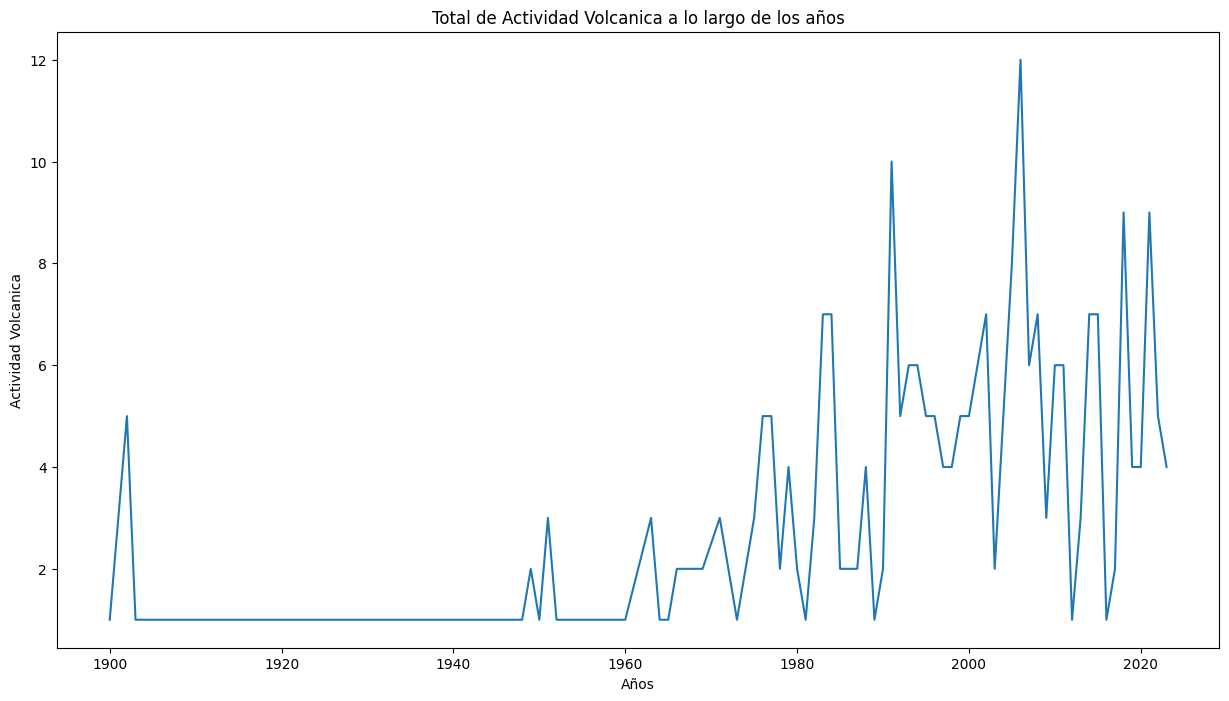

In [548]:
actividad_volcanica_no_2024 = excluir_2024[excluir_2024['Entity'] == 'Volcanic activity']
plt.figure(figsize=(15,8))
plt.plot(actividad_volcanica_no_2024['Year'],actividad_volcanica_no_2024['Disasters'])
plt.ylabel('Actividad Volcanica')
plt.xlabel('Años')
plt.title('Total de Actividad Volcanica a lo largo de los años')
plt.show()

In [549]:
actividad_volcanica_no_2024 = excluir_2024[excluir_2024['Entity'] == 'Volcanic activity']
# Encontrar el índice del año con la mayor cantidad de desastres
año_mayor_volcanica_idx = actividad_volcanica_no_2024['Disasters'].idxmax()
año_mayor_desastres_volcanica = actividad_volcanica_no_2024.loc[año_mayor_volcanica_idx]

print('Desde el año 1900 al 2023 a habido un total de',actividad_volcanica_no_2024['Disasters'].sum(),'erupcion volcanica')
print(f'El año que se registró la mayor cantidad de actividad volcanica fue en {año_mayor_desastres_volcanica["Year"]} con un total de {año_mayor_desastres_volcanica["Disasters"]} volcanes activos')

Desde el año 1900 al 2023 a habido un total de 278 erupcion volcanica
El año que se registró la mayor cantidad de actividad volcanica fue en 2006 con un total de 12 volcanes activos


# Inundación

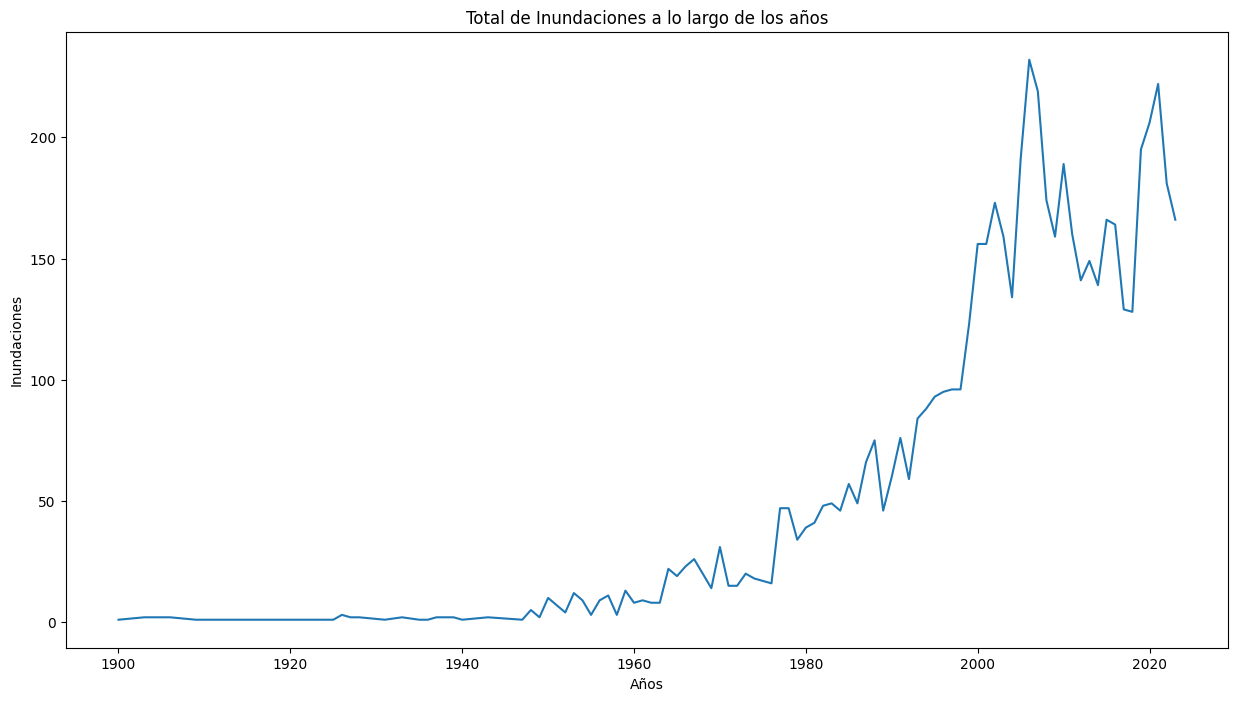

In [550]:
inundacion_no_2024 = excluir_2024[excluir_2024['Entity'] == 'Flood']
plt.figure(figsize=(15,8))
plt.plot(inundacion_no_2024['Year'],inundacion_no_2024['Disasters'])
plt.ylabel('Inundaciones')
plt.xlabel('Años')
plt.title('Total de Inundaciones a lo largo de los años')
plt.show()

In [551]:
inundacion_no_2024 = excluir_2024[excluir_2024['Entity'] == 'Flood']
# Encontrar el índice del año con la mayor cantidad de desastres
año_mayor_inundacion_idx = inundacion_no_2024['Disasters'].idxmax()
año_mayor_desastres_inundacion = inundacion_no_2024.loc[año_mayor_inundacion_idx]

print(f'Desde el año 1900 al 2023 a habido un total de',inundacion_no_2024['Disasters'].sum(),'inundaciones')
print(f'El año que se registró la mayor cantidad de inundaciones fue en {año_mayor_desastres_inundacion["Year"]} con un total de {año_mayor_desastres_inundacion["Disasters"]} maremotos')

Desde el año 1900 al 2023 a habido un total de 6013 inundaciones
El año que se registró la mayor cantidad de inundaciones fue en 2006 con un total de 232 maremotos


# Dry mass movement = Movimiento de masa (Huaycos)

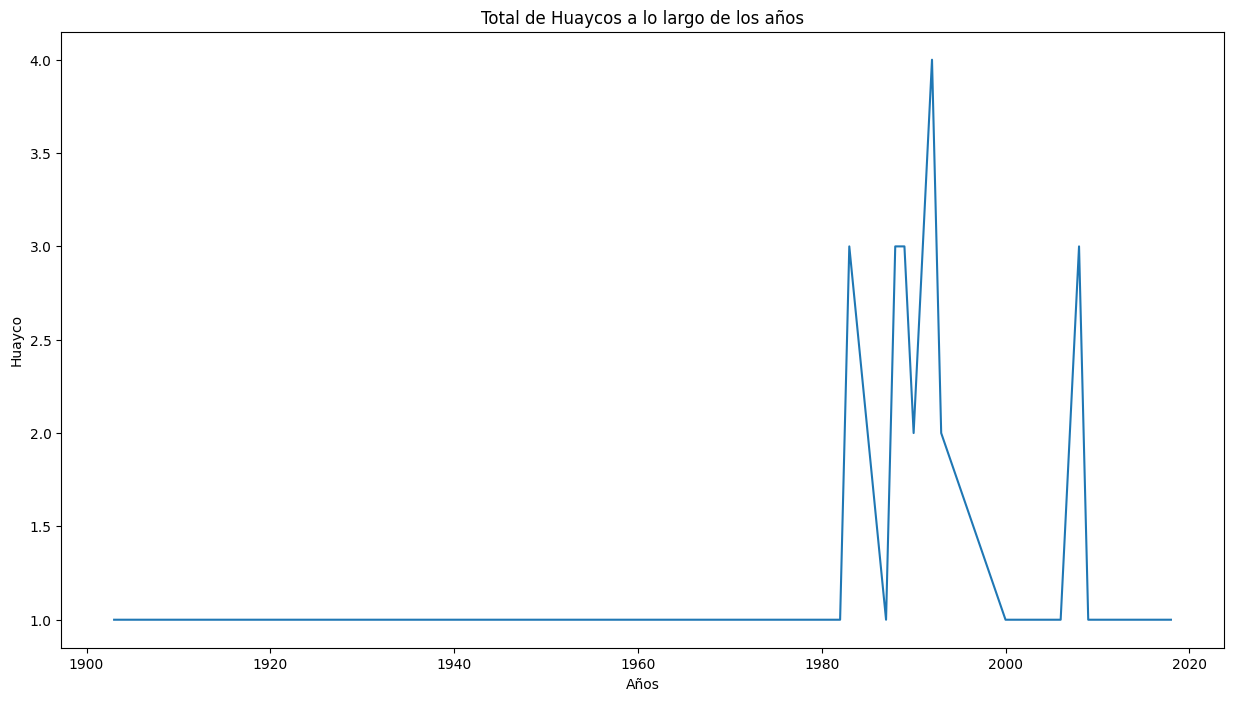

In [552]:
huayco_no_2024 = excluir_2024[excluir_2024['Entity'] == 'Dry mass movement']
plt.figure(figsize=(15,8))
plt.plot(huayco_no_2024['Year'],huayco_no_2024['Disasters'])
plt.ylabel('Huayco')
plt.xlabel('Años')
plt.title('Total de Huaycos a lo largo de los años')
plt.show()

In [553]:
huayco_no_2024 = excluir_2024[excluir_2024['Entity'] == 'Dry mass movement']
# Encontrar el índice del año con la mayor cantidad de desastres
año_mayor_huayco_idx = huayco_no_2024['Disasters'].idxmax()
año_mayor_huayco_inundacion = huayco_no_2024.loc[año_mayor_huayco_idx]

print('Desde el año 1900 al 2023 a habido un total de',huayco_no_2024['Disasters'].sum(),'huaycos')
print(f'El año que se registró la mayor cantidad de Huayocs fue en {año_mayor_huayco_inundacion["Year"]} con un total de {año_mayor_huayco_inundacion["Disasters"]} huaycos')

Desde el año 1900 al 2023 a habido un total de 45 huaycos
El año que se registró la mayor cantidad de Huayocs fue en 1992 con un total de 4 huaycos


# Predicciones desde el año 2024 al 2100

In [554]:
excluir_2024 = df2[df2['Year'] != 2024]
año_mayor_no_2024 = excluir_2024.groupby('Year')['Disasters'].sum().tail()
print(año_mayor_no_2024)

Year
2019    1598
2020    1606
2021    1733
2022    1689
2023    1598
Name: Disasters, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [556]:
# Seleccionar las características y la variable objetivo
X = df[['Year']]
y = df['Disasters']

# Ajustar el modelo de regresión lineal con todos los datos disponibles
model = LinearRegression()
model.fit(X, y)

# Hacer predicciones para los años 2024 y 2025
predictions = model.predict([[2024], [2025]])

print(f'Predicción del número de desastres naturales en 2024: {predictions[0]}')
print(f'Predicción del número de desastres naturales en 2025: {predictions[1]}')

Predicción del número de desastres naturales en 2024: 122.81609209577118
Predicción del número de desastres naturales en 2025: 124.0807440721751


c:\Users\FRANK\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
